In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_csv('C:/Netology/Machine_Learning/Lecture_11/train_h.csv')

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#Разделяем на тренировочные и тестовые данные

data_train, data_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'), data['SalePrice'], test_size=0.30, random_state=42)

In [9]:
#Находим категориальные признаки

categorials = list(data.dtypes[data.dtypes == object].index)

categorials_nunique = data_train[categorials].nunique()

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию

data[categorials] = data[categorials].fillna('nan')

In [10]:
#отфильтруем непрерывные признаки

integer = [f for f in data if f not in (categorials + ['ID', 'SalePrice'])]

In [11]:
# Создаем дамми-переменные для категорий

dummy_train = pd.get_dummies(data_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(data_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить

X_train = pd.concat([data_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([data_test[integer].fillna(-999), dummy_test], axis=1)

In [12]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Alley_Grvl,Neighborhood_NWAmes,SaleType_ConLI,Functional_Maj2,Foundation_Stone,BsmtExposure_Av,SaleType_ConLw,LandSlope_Mod,Heating_GasA,GarageCond_Gd
135,136,20,80.0,10400,7,6,1970,1970,288.0,0,...,0,1,0,0,0,0,0,0,1,0
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,0,0,0,0,0,0,0,0,1,0
762,763,60,72.0,8640,7,5,2009,2009,0.0,24,...,0,0,0,0,0,0,0,0,1,0
932,933,20,84.0,11670,9,5,2006,2006,302.0,0,...,0,0,0,0,0,0,0,0,1,0
435,436,60,43.0,10667,7,6,1996,1996,0.0,385,...,0,0,0,0,0,1,1,0,1,0


In [14]:
# Создаем модель RandomForest

clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
# проверяем полученные данные на тренировочных данных

clf_rf.score(X_train, y_train)

0.9758491123391011

In [16]:
# проверяем полученные данные на тестовых данных

clf_rf.score(X_test, y_test)

#Модель получилась не много переобученной

0.8916813824964428

In [17]:
# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю

imp = pd.Series(clf_rf.feature_importances_)

In [18]:
imp.index = pd.Series(X_train.columns)

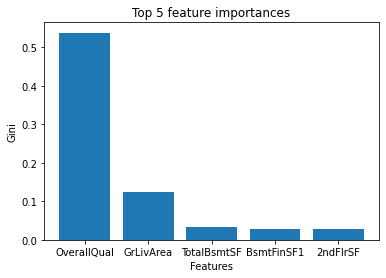

In [21]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

## Стекинг

In [30]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV

In [31]:
# Создаем стэккинг и обучаем его на наших данных 

Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('LassoCV', LassoCV()),
        ('DecisionTree', DecisionTreeRegressor()),
        ('ElasticNetCV', ElasticNetCV()),
        ('RidgeCV', RidgeCV())
    ])

In [32]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('LassoCV', LassoCV()),
                              ('DecisionTree', DecisionTreeRegressor()),
                              ('ElasticNetCV', ElasticNetCV()),
                              ('RidgeCV',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

In [33]:
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train data 0.9179581994186965
Score on test data 0.8637698985994018
Score on train data with model LinearRegression 0.9221085403562431
Score on test data with model LinearRegression 0.8533836050579278
Score on train data with model LassoCV 0.6928223603294468
Score on test data with model LassoCV 0.7658868514414778
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7256868495729198
Score on train data with model ElasticNetCV 0.56045771857828
Score on test data with model ElasticNetCV 0.6106792924774815
Score on train data with model RidgeCV 0.893813313074804
Score on test data with model RidgeCV 0.8743354509181865


Лучше всего справилась линейная регрессия.

In [34]:
score_train = {}
score_test = {}

for i in Regressor.named_estimators:
    score_train[i] = Regressor.named_estimators_[i].score(X_train, y_train)
    score_test[i] = Regressor.named_estimators_[i].score(X_test, y_test)

score_train['Total']= Regressor.score(X_train, y_train)
score_test['Total']= Regressor.score(X_test, y_test)

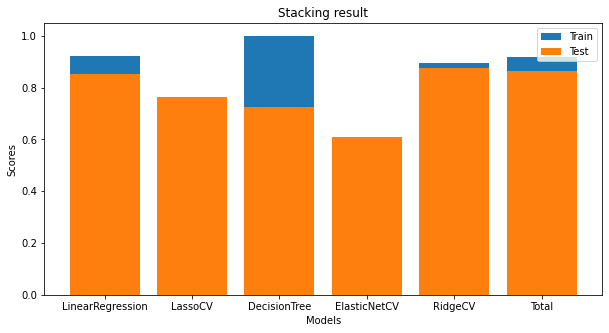

In [35]:
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()